In [10]:
import requests, zipfile, io
z = zipfile.ZipFile('./data/archive.zip','r')
z.extractall('./data')

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data/train_df.csv')
df

,SOPInstanceUID,Target,MultiImageType,ImageType,ImageType1,InstanceCreationDate,InstanceCreationTime,SOPClassUID,StudyDate,SeriesDate,...,WindowWidth,ImageType2,KVP,DistanceSourceToDetector,DistanceSourceToPatient,ExposureTime,XRayTubeCurrent,AcquisitionNumber,ImageType3,image_path
0,1.2.826.0.1.3680043.8.498.10025629581362719970...,0,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./images/train/1.2.826.0.1.3680043.8.498.10025...
1,1.2.826.0.1.3680043.8.498.10036150326276641158...,15,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./images/train/1.2.826.0.1.3680043.8.498.10036...
2,1.2.826.0.1.3680043.8.498.10038426859954986240...,12,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./images/train/1.2.826.0.1.3680043.8.498.10038...
3,1.2.826.0.1.3680043.8.498.10050991192143676483...,14,NaN,NaN,NaN,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./images/train/1.2.826.0.1.3680043.8.498.10050...
4,1.2.826.0.1.3680043.8.498.10053309524595490852...,3,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./images/train/1.2.826.0.1.3680043.8.498.10053...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,1.2.826.0.1.3680043.8.498.99711016467406172920...,14,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./images/train/1.2.826.0.1.3680043.8.498.99711...
1734,1.2.826.0.1.3680043.8.498.99727280485333900933...,11,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./images/train/1.2.826.0.1.3680043.8.498.99727...
1735,1.2.826.0.1.3680043.8.498.99935008698914755885...,3,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./images/train/1.2.826.0.1.3680043.8.498.99935...
1736,1.2.826.0.1.3680043.8.498.99969671777553755311...,2,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./images/train/1.2.826.0.1.3680043.8.498.99969...


In [3]:
df = df[df['Target'].apply(lambda x: x.strip().isnumeric())]

In [4]:
labels = df.Target.apply(int).values.tolist()
labels[:10]

[0, 15, 12, 14, 3, 3, 14, 3, 3, 3]

In [15]:
from collections import Counter
import os

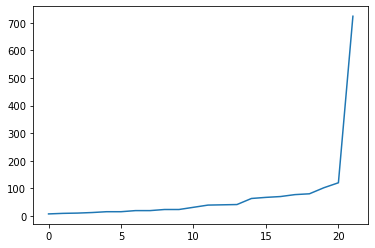

In [12]:
import matplotlib.pyplot as plt
plt.plot(sorted(Counter(labels).values()))

In [17]:
label_freq = dict(Counter(labels))
selected_labels = [k for k,v in label_freq.items() if v>=40]
filtered_image_paths, filtered_labels = [], []
for label, image_path in zip(labels, df.image_path.values):
    if label in selected_labels:
        filtered_labels.append(selected_labels.index(label))
        filtered_image_paths.append(os.path.join('data',image_path))

In [19]:
len(filtered_image_paths)

1384

In [18]:
len(filtered_labels)

1384

In [15]:
import os
image_paths = [os.path.join('data',i) for i in  df.image_path.values]
image_paths[:10]

['data/./images/train/1.2.826.0.1.3680043.8.498.10025629581362719970278200333618114258-c.png',
 'data/./images/train/1.2.826.0.1.3680043.8.498.10036150326276641158002573300029848125-c.png',
 'data/./images/train/1.2.826.0.1.3680043.8.498.10038426859954986240523417641213777162-c.png',
 'data/./images/train/1.2.826.0.1.3680043.8.498.10050991192143676483577217922037244257-c.png',
 'data/./images/train/1.2.826.0.1.3680043.8.498.10053309524595490852815579052225336016-c.png',
 'data/./images/train/1.2.826.0.1.3680043.8.498.10053755320637729867508668285241208441-c.png',
 'data/./images/train/1.2.826.0.1.3680043.8.498.10062189329714053601496804394945741428-c.png',
 'data/./images/train/1.2.826.0.1.3680043.8.498.10072001800484199846734151421006166369-c.png',
 'data/./images/train/1.2.826.0.1.3680043.8.498.10077219503857952412254959562456136784-c.png',
 'data/./images/train/1.2.826.0.1.3680043.8.498.10080310665124574896848143784790467773-c.png']

In [19]:
from sklearn.model_selection import train_test_split
path_train, path_test, y_train, y_test = train_test_split(image_paths, labels,
                                                    stratify=labels, 
                                                    test_size=0.25)

In [ ]:
path_train

In [1]:
import os
import pandas as pd
import torch
from torchvision.io import read_image
from torch.utils.data import DataLoader,Dataset

class CustomImageDataset(Dataset):
    def __init__(self, labels, img_paths, transform=None, target_transform=None):
        self.img_labels = labels
        self.img_paths = img_paths
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = self.img_paths[idx]
        image = read_image(img_path)
        label = self.img_labels[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [42]:
training_data = CustomImageDataset(y_train, path_train, transform=transforms.Compose([transforms.Resize([256,256 ]), transforms.ConvertImageDtype(torch.float), transforms.Normalize((0.1307,), (0.3081,))]))
test_data = CustomImageDataset(y_test, path_test, transform=transforms.Compose([transforms.Resize([256,256 ]), transforms.ConvertImageDtype(torch.float), transforms.Normalize((0.1307,), (0.3081,))]))


In [43]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [44]:
for x, y in train_dataloader:
    print(x.shape, y.shape)

torch.Size([64, 1, 256, 256]) torch.Size([64])
torch.Size([64, 1, 256, 256]) torch.Size([64])
torch.Size([64, 1, 256, 256]) torch.Size([64])
torch.Size([64, 1, 256, 256]) torch.Size([64])
torch.Size([64, 1, 256, 256]) torch.Size([64])
torch.Size([64, 1, 256, 256]) torch.Size([64])
torch.Size([64, 1, 256, 256]) torch.Size([64])
torch.Size([64, 1, 256, 256]) torch.Size([64])
torch.Size([64, 1, 256, 256]) torch.Size([64])
torch.Size([64, 1, 256, 256]) torch.Size([64])
torch.Size([64, 1, 256, 256]) torch.Size([64])
torch.Size([64, 1, 256, 256]) torch.Size([64])
torch.Size([64, 1, 256, 256]) torch.Size([64])
torch.Size([64, 1, 256, 256]) torch.Size([64])
torch.Size([64, 1, 256, 256]) torch.Size([64])
torch.Size([64, 1, 256, 256]) torch.Size([64])
torch.Size([64, 1, 256, 256]) torch.Size([64])
torch.Size([64, 1, 256, 256]) torch.Size([64])
torch.Size([52, 1, 256, 256]) torch.Size([52])


In [3]:
from torchvision import datasets, transforms

In [4]:
data = datasets.MNIST('.', train=True, download=True, transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [7]:
type(data[0][1])

int

In [20]:
text="""init fedtask...done
init clients...done
init server...done
--------------Round 0--------------
set()
Time Cost:                    33.5104s
Training Loss: 1.7785892391466194
Testing Loss: 2.835494272178308
Testing Accuracy: (0.2960982664504407, 0.031791907514450865, 0.5462427738774029)
Mean of Client Accuracy: 0.32603116780519487
Std of Client Accuracy: 0.3333549749610086
--------------Round 1--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    32.6129s
Training Loss: 1.2528062191157716
Testing Loss: 3.098294181458523
Testing Accuracy: (0.2697976881315167, 0.031791907514450865, 0.578034683459067)
Mean of Client Accuracy: 0.45301471278071404
Std of Client Accuracy: 0.31692258146596214
--------------Round 2--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    30.8405s
Training Loss: 0.7727635857557263
Testing Loss: 3.422884608796566
Testing Accuracy: (0.27268786163774533, 0.031791907514450865, 0.6213872825479232)
Mean of Client Accuracy: 0.5178063794970512
Std of Client Accuracy: 0.2892814739936273
--------------Round 3--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    26.3942s
Training Loss: 0.636048025634235
Testing Loss: 3.582106821350968
Testing Accuracy: (0.2790462431244854, 0.03179190762211822, 0.6213872832369942)
Mean of Client Accuracy: 0.5638725541532039
Std of Client Accuracy: 0.29298602001844354
--------------Round 4--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    30.4431s
Training Loss: 0.5922144178559734
Testing Loss: 3.755651937364843
Testing Accuracy: (0.2750000004565096, 0.03179190762211822, 0.6213872832369942)
Mean of Client Accuracy: 0.6003483936190606
Std of Client Accuracy: 0.27376815546696953
--------------Round 5--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    33.5781s
Training Loss: 0.5099703457465126
Testing Loss: 3.8001634188125593
Testing Accuracy: (0.28627167646423246, 0.03179190762211822, 0.6213872822033877)
Mean of Client Accuracy: 0.6105042077600956
Std of Client Accuracy: 0.25671570180582143
--------------Round 6--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    33.5016s
Training Loss: 0.5566638616952636
Testing Loss: 3.9911557336074077
Testing Accuracy: (0.2682080929291386, 0.031791907514450865, 0.5751445100486623)
Mean of Client Accuracy: 0.5877713672816753
Std of Client Accuracy: 0.24940705701591162
--------------Round 7--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    35.8102s
Training Loss: 0.3027695035710806
Testing Loss: 4.101133866944065
Testing Accuracy: (0.3059248559812159, 0.06647398854697371, 0.6156069360716494)
Mean of Client Accuracy: 0.6265908129513263
Std of Client Accuracy: 0.1973806932312153
--------------Round 8--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    29.7946s
Training Loss: 0.2813908871491275
Testing Loss: 4.048508006506573
Testing Accuracy: (0.3078034685084844, 0.09826589599682417, 0.6156069357271139)
Mean of Client Accuracy: 0.6368096515536308
Std of Client Accuracy: 0.14570590510298098
--------------Round 9--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    33.5741s
Training Loss: 0.15946711690406726
Testing Loss: 4.059647135031705
Testing Accuracy: (0.3280346821799788, 0.09826589599682417, 0.6127167623167094)
Mean of Client Accuracy: 0.6702416077256202
Std of Client Accuracy: 0.1572670928996485
--------------Round 10--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    33.1592s
Training Loss: 0.07171209326612873
Testing Loss: 4.1301345616062255
Testing Accuracy: (0.33367052048961543, 0.07803468229625955, 0.6127167650729934)
Mean of Client Accuracy: 0.6405293047428131
Std of Client Accuracy: 0.1873272536650443
--------------Round 11--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    34.0456s
Training Loss: 0.06493865638000303
Testing Loss: 4.159996016935118
Testing Accuracy: (0.3375722547799263, 0.0780346821885922, 0.6213872825479232)
Mean of Client Accuracy: 0.7013077810406685
Std of Client Accuracy: 0.1649674112798917
--------------Round 12--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    22.3209s
Training Loss: 0.12367494957763747
Testing Loss: 4.239909328270509
Testing Accuracy: (0.3202312140795537, 0.09826589595375723, 0.6213872849596718)
Mean of Client Accuracy: 0.6740406230092049
Std of Client Accuracy: 0.18259945884296475
--------------Round 13--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    32.6708s
Training Loss: 0.10402146252904464
Testing Loss: 4.215606611036841
Testing Accuracy: (0.32528901774694635, 0.09826589599682417, 0.6213872853042073)
Mean of Client Accuracy: 0.7074941724538804
Std of Client Accuracy: 0.1832667966475125
--------------Round 14--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    32.6132s
Training Loss: 0.05053043800511655
Testing Loss: 4.2510440824348805
Testing Accuracy: (0.33887283262403717, 0.10693641622803804, 0.6213872828924587)
Mean of Client Accuracy: 0.7172105595469475
Std of Client Accuracy: 0.1626595316476753
--------------Round 15--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    36.0095s
Training Loss: 0.03863985616153381
Testing Loss: 4.233470086210724
Testing Accuracy: (0.34017341073516305, 0.10982658981071042, 0.618497109482054)
Mean of Client Accuracy: 0.7158502638339996
Std of Client Accuracy: 0.1793466253947149
--------------Round 16--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    28.5226s
Training Loss: 0.033927853308259606
Testing Loss: 4.207311432623451
Testing Accuracy: (0.33988439346733645, 0.10404624281763342, 0.6184971118938027)
Mean of Client Accuracy: 0.7117186099290848
Std of Client Accuracy: 0.18125562656384425
--------------Round 17--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    35.0577s
Training Loss: 0.027205271957731147
Testing Loss: 4.258473701146297
Testing Accuracy: (0.33887283268110086, 0.11560693684685437, 0.6242774583700764)
Mean of Client Accuracy: 0.7075869590044022
Std of Client Accuracy: 0.17331483497702374
--------------Round 18--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    33.6234s
Training Loss: 0.06795061933501748
Testing Loss: 4.317619540787847
Testing Accuracy: (0.336416184975405, 0.09248554924061533, 0.6242774559583278)
Mean of Client Accuracy: 0.7045757517218589
Std of Client Accuracy: 0.19890385973671204
--------------Round 19--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    34.5406s
Training Loss: 0.017892938441042214
Testing Loss: 4.199075242411883
Testing Accuracy: (0.33945086748592257, 0.11560693652385232, 0.6242774576810054)
Mean of Client Accuracy: 0.6989910185337067
Std of Client Accuracy: 0.20673157432094152
--------------Round 20--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    29.4489s
Training Loss: 0.017961785483404304
Testing Loss: 4.2115731061538515
Testing Accuracy: (0.33872832391368, 0.10693641629263845, 0.6213872825479232)
Mean of Client Accuracy: 0.7236688911914826
Std of Client Accuracy: 0.17538215188502934
--------------Round 21--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    34.7913s
Training Loss: 0.0662620345773754
Testing Loss: 4.372804963967704
Testing Accuracy: (0.33656069433714964, 0.095375722974022, 0.6329479779122192)
Mean of Client Accuracy: 0.721530120074749
Std of Client Accuracy: 0.17202570892528193
--------------Round 22--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    29.9830s
Training Loss: 0.02180280849217334
Testing Loss: 4.278195428228104
Testing Accuracy: (0.3368497112141437, 0.10982658970304307, 0.6329479761895417)
Mean of Client Accuracy: 0.7213667184114456
Std of Client Accuracy: 0.18097228733566795
--------------Round 23--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    29.6838s
Training Loss: 0.019418536127577837
Testing Loss: 4.267257227098321
Testing Accuracy: (0.3387283241860784, 0.11849710986965653, 0.6329479786012903)
Mean of Client Accuracy: 0.6865505442023278
Std of Client Accuracy: 0.1988928138946497
--------------Round 24--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    34.3562s
Training Loss: 0.02032943171489843
Testing Loss: 4.297691314206646
Testing Accuracy: (0.33786127186256515, 0.09826589621215887, 0.6329479765340772)
Mean of Client Accuracy: 0.7125571966171265
Std of Client Accuracy: 0.19538903984194939
--------------Round 25--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    36.1521s
Training Loss: 0.039951166352449975
Testing Loss: 4.368244303134135
Testing Accuracy: (0.3397398848872567, 0.09826589606142458, 0.6329479761895417)
Mean of Client Accuracy: 0.7220955938100815
Std of Client Accuracy: 0.20187822874701106
--------------Round 26--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    35.8824s
Training Loss: 0.053706772193390914
Testing Loss: 4.454898674949745
Testing Accuracy: (0.3387283240385741, 0.11560693645925191, 0.6329479782567548)
Mean of Client Accuracy: 0.706832404434681
Std of Client Accuracy: 0.21016159110553378
--------------Round 27--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    33.8179s
Training Loss: 0.09582015259410329
Testing Loss: 4.76693650366943
Testing Accuracy: (0.33641618510891247, 0.07514450892892187, 0.618497109482054)
Mean of Client Accuracy: 0.7044812172651291
Std of Client Accuracy: 0.2177446467504495
--------------Round 28--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    38.2730s
Training Loss: 0.16533173884755176
Testing Loss: 4.815694916248322
Testing Accuracy: (0.32312138737475427, 0.07514450867052024, 0.6213872832369942)
Mean of Client Accuracy: 0.6880479797720909
Std of Client Accuracy: 0.20147884098539653
--------------Round 29--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    26.8268s
Training Loss: 0.08801386550017241
Testing Loss: 4.459381524572483
Testing Accuracy: (0.3290462431072586, 0.1184971100419243, 0.6213872825479232)
Mean of Client Accuracy: 0.7217781350016594
Std of Client Accuracy: 0.19361730061060628
--------------Round 30--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    31.8263s
Training Loss: 0.06302222284478738
Testing Loss: 4.368156681033229
Testing Accuracy: (0.3329479773501957, 0.11271676343644975, 0.6242774563028634)
Mean of Client Accuracy: 0.7210545107722283
Std of Client Accuracy: 0.1758356899771994
--------------Round 31--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    33.9371s
Training Loss: 0.0795613355672579
Testing Loss: 4.424956952009587
Testing Accuracy: (0.32514450868667033, 0.1127167631134477, 0.6213872825479232)
Mean of Client Accuracy: 0.6963813066482544
Std of Client Accuracy: 0.20203923132951507
--------------Round 32--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    31.3434s
Training Loss: 0.08307593145944828
Testing Loss: 4.467109658883486
Testing Accuracy: (0.328323699587773, 0.12138728328006115, 0.6213872832369942)
Mean of Client Accuracy: 0.7111834794282913
Std of Client Accuracy: 0.16644840291411528
--------------Round 33--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    29.1156s
Training Loss: 0.03274591266586041
Testing Loss: 4.445219426037949
Testing Accuracy: (0.33916185005228816, 0.11560693684685437, 0.6213872828924587)
Mean of Client Accuracy: 0.7301173031330108
Std of Client Accuracy: 0.1659391125069502
--------------Round 34--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    25.9058s
Training Loss: 0.08062645067136048
Testing Loss: 4.63039523204627
Testing Accuracy: (0.3358381508908779, 0.046242774566473986, 0.6213872828924587)
Mean of Client Accuracy: 0.668940830975771
Std of Client Accuracy: 0.2582530247156115
--------------Round 35--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    28.2486s
Training Loss: 0.07145482039203284
Testing Loss: 4.580585063881958
Testing Accuracy: (0.3429190756957655, 0.046242774566473986, 0.6387283254220996)
Mean of Client Accuracy: 0.682993122190237
Std of Client Accuracy: 0.24794316613022188
--------------Round 36--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    35.5481s
Training Loss: 0.07500541217009175
Testing Loss: 4.609931414733732
Testing Accuracy: (0.3411849713631276, 0.046242774566473986, 0.6242774552692568)
Mean of Client Accuracy: 0.6947986774146557
Std of Client Accuracy: 0.2568298387303689
--------------Round 37--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    30.5630s
Training Loss: 0.07247667950281678
Testing Loss: 4.700929444098058
Testing Accuracy: (0.33815028982376943, 0.04624277467414134, 0.6242774587146119)
Mean of Client Accuracy: 0.7119817979633808
Std of Client Accuracy: 0.20952937218151713
--------------Round 38--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    31.8028s
Training Loss: 0.06470285073017994
Testing Loss: 4.622892285151289
Testing Accuracy: (0.3446531797538516, 0.04624277467414134, 0.6329479789458259)
Mean of Client Accuracy: 0.7113019444048405
Std of Client Accuracy: 0.20785240487223589
--------------Round 39--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    28.8855s
Training Loss: 0.0065919736054403785
Testing Loss: 4.421913034481809
Testing Accuracy: (0.34884393089639315, 0.11849710991272347, 0.6329479761895417)
Mean of Client Accuracy: 0.7391590878367424
Std of Client Accuracy: 0.1926479902473525
--------------Round 40--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    27.7466s
Training Loss: 0.010635878375604358
Testing Loss: 4.466203309655879
Testing Accuracy: (0.34537572307307596, 0.11849710986965653, 0.627167629713268)
Mean of Client Accuracy: 0.6933607682585716
Std of Client Accuracy: 0.23995554628597465
--------------Round 41--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    25.9152s
Training Loss: 0.012086994076078479
Testing Loss: 4.5095050335619495
Testing Accuracy: (0.34624277495622974, 0.11849710986965653, 0.6271676314359456)
Mean of Client Accuracy: 0.7094514548778534
Std of Client Accuracy: 0.19580329374759847
--------------Round 42--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    30.0683s
Training Loss: 0.007332611758250292
Testing Loss: 4.506847303278873
Testing Accuracy: (0.3472543353333294, 0.10982658981071042, 0.6358381520116949)
Mean of Client Accuracy: 0.7292880579829216
Std of Client Accuracy: 0.17655258697581475
--------------Round 43--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    30.2564s
Training Loss: 0.005399228817523524
Testing Loss: 4.475082283591948
Testing Accuracy: (0.34956647445571565, 0.118497110257259, 0.6358381504612851)
Mean of Client Accuracy: 0.7052947089076043
Std of Client Accuracy: 0.19159072013596415
--------------Round 44--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    33.3168s
Training Loss: 0.0044976597155975215
Testing Loss: 4.4780503563109155
Testing Accuracy: (0.347832370382556, 0.11560693663151968, 0.6329479789458259)
Mean of Client Accuracy: 0.6997391536831856
Std of Client Accuracy: 0.1910184708198083
--------------Round 45--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    38.8569s
Training Loss: 0.004227823895446493
Testing Loss: 4.474378206137288
Testing Accuracy: (0.34667630106469105, 0.11560693645925191, 0.627167629713268)
Mean of Client Accuracy: 0.7174474880099296
Std of Client Accuracy: 0.1952087405487021
--------------Round 46--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    28.8377s
Training Loss: 0.004682155333453138
Testing Loss: 4.540529800598332
Testing Accuracy: (0.3452312139998798, 0.1127167631134477, 0.62716763109141)
Mean of Client Accuracy: 0.7185241684317589
Std of Client Accuracy: 0.18713117183769615
--------------Round 47--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    28.4601s
Training Loss: 0.005996586299253499
Testing Loss: 4.504159062963
Testing Accuracy: (0.347109826897524, 0.11271676322111504, 0.6213872825479232)
Mean of Client Accuracy: 0.708916325867176
Std of Client Accuracy: 0.1924804710985776
--------------Round 48--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    25.7233s
Training Loss: 0.00407333933442307
Testing Loss: 4.481921518262411
Testing Accuracy: (0.3486994224412076, 0.11849710986965653, 0.6213872849596718)
Mean of Client Accuracy: 0.7130479797720909
Std of Client Accuracy: 0.19074458778566938
--------------Round 49--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    31.4804s
Training Loss: 0.005553620071950097
Testing Loss: 4.515231904955957
Testing Accuracy: (0.3453757228448212, 0.11271676322111504, 0.6184971112047317)
Mean of Client Accuracy: 0.7056623563170433
Std of Client Accuracy: 0.18366677403515638
--------------Round 50--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    30.1730s
Training Loss: 0.006043659597431082
Testing Loss: 4.537419783827887
Testing Accuracy: (0.34494219716379926, 0.1127167631134477, 0.6213872842706007)
Mean of Client Accuracy: 0.7467781350016593
Std of Client Accuracy: 0.16362252748169917
--------------Round 51--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    28.9551s
Training Loss: 0.005975744041560919
Testing Loss: 4.52484782003943
Testing Accuracy: (0.34725433543023, 0.10982658970304307, 0.6300578024346015)
Mean of Client Accuracy: 0.734129325300455
Std of Client Accuracy: 0.19370576358934496
--------------Round 52--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    29.4067s
Training Loss: 0.007699348121806616
Testing Loss: 4.524118454676833
Testing Accuracy: (0.34508670556945775, 0.0953757227586873, 0.6329479751559351)
Mean of Client Accuracy: 0.765875355899334
Std of Client Accuracy: 0.15321752940912933
--------------Round 53--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    26.2826s
Training Loss: 0.012671268824927496
Testing Loss: 4.604176827868974
Testing Accuracy: (0.34378612744002846, 0.0953757227586873, 0.6329479786012903)
Mean of Client Accuracy: 0.7373739570379257
Std of Client Accuracy: 0.16674894316693054
--------------Round 54--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    29.8242s
Training Loss: 0.006144276327485033
Testing Loss: 4.493981417100554
Testing Accuracy: (0.3462427746149243, 0.1127167631134477, 0.6213872832369942)
Mean of Client Accuracy: 0.7450274348258972
Std of Client Accuracy: 0.15950005914314538
--------------Round 55--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    29.0435s
Training Loss: 0.018961073667479986
Testing Loss: 4.7230673566719
Testing Accuracy: (0.34046242817418076, 0.10982658959537572, 0.6213872849596718)
Mean of Client Accuracy: 0.7097210630774498
Std of Client Accuracy: 0.18817468690869812
--------------Round 56--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    34.9072s
Training Loss: 0.013509111472479636
Testing Loss: 4.705980713415697
Testing Accuracy: (0.34479768847712894, 0.10982659045671452, 0.6358381492554108)
Mean of Client Accuracy: 0.7046352788805962
Std of Client Accuracy: 0.18801430725396556
--------------Round 57--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    29.0916s
Training Loss: 0.007111281287276734
Testing Loss: 4.563110631669876
Testing Accuracy: (0.3436416190957403, 0.1184971100419243, 0.6329479789458259)
Mean of Client Accuracy: 0.7069024398922921
Std of Client Accuracy: 0.16945117194296777
--------------Round 58--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    26.5164s
Training Loss: 0.005047673861474597
Testing Loss: 4.555505483825772
Testing Accuracy: (0.34407514485535934, 0.11560693645925191, 0.6300578051908857)
Mean of Client Accuracy: 0.7136484697461128
Std of Client Accuracy: 0.1814959261058565
--------------Round 59--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    29.8381s
Training Loss: 0.005051347554971018
Testing Loss: 4.543762515183818
Testing Accuracy: (0.3434971100419243, 0.10982658959537572, 0.6416184988325042)
Mean of Client Accuracy: 0.7407119601964951
Std of Client Accuracy: 0.16064268312111019
--------------Round 60--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    29.4236s
Training Loss: 0.0017643339437660598
Testing Loss: 4.586803620536893
Testing Accuracy: (0.3479768792264207, 0.10693641622803804, 0.6473988456533134)
Mean of Client Accuracy: 0.7398191034793854
Std of Client Accuracy: 0.1710918628086634
--------------Round 61--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    30.0146s
Training Loss: 0.0018079545091946544
Testing Loss: 4.5230853669216184
Testing Accuracy: (0.3488439311084978, 0.1069364166156405, 0.6329479782567548)
Mean of Client Accuracy: 0.7298984706401825
Std of Client Accuracy: 0.17553135991385302
--------------Round 62--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    27.2610s
Training Loss: 0.0033718353923390043
Testing Loss: 4.564901342970788
Testing Accuracy: (0.3468208095435634, 0.1069364166156405, 0.6358381516671594)
Mean of Client Accuracy: 0.7368575036525726
Std of Client Accuracy: 0.16750611972003204
--------------Round 63--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    33.1997s
Training Loss: 0.003208400030128644
Testing Loss: 4.54612326163777
Testing Accuracy: (0.34739884429239815, 0.1069364164003058, 0.6300578051908857)
Mean of Client Accuracy: 0.7243925169110298
Std of Client Accuracy: 0.185646191696778
--------------Round 64--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    39.3740s
Training Loss: 0.003102064475271937
Testing Loss: 4.539171430830321
Testing Accuracy: (0.34783237020705826, 0.10693641721857766, 0.6329479786012903)
Mean of Client Accuracy: 0.7509593933820724
Std of Client Accuracy: 0.18202061238749973
--------------Round 65--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    30.1724s
Training Loss: 0.0016231382559632132
Testing Loss: 4.554635728301341
Testing Accuracy: (0.3500000000204568, 0.10693641622803804, 0.6300578031236725)
Mean of Client Accuracy: 0.7707510605454445
Std of Client Accuracy: 0.1604234137239345
--------------Round 66--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    39.5295s
Training Loss: 0.0017435845986165188
Testing Loss: 4.56729839633655
Testing Accuracy: (0.3482658960452744, 0.1069364164003058, 0.6329479765340772)
Mean of Client Accuracy: 0.7604832038283348
Std of Client Accuracy: 0.16431997739671214
--------------Round 67--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    36.2047s
Training Loss: 0.0020257674216323427
Testing Loss: 4.556703482232342
Testing Accuracy: (0.3475433529930652, 0.10693641622803804, 0.6329479755004707)
Mean of Client Accuracy: 0.7296008512377739
Std of Client Accuracy: 0.16043866967982753
--------------Round 68--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    32.0278s
Training Loss: 0.0033283586596534673
Testing Loss: 4.55502792906899
Testing Accuracy: (0.3466763008795033, 0.11560693650231885, 0.6271676317804811)
Mean of Client Accuracy: 0.7266596749424934
Std of Client Accuracy: 0.15936439338013342
--------------Round 69--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    38.8747s
Training Loss: 0.0029942124311916583
Testing Loss: 4.529070770327066
Testing Accuracy: (0.3494219655860108, 0.11849710986965653, 0.6329479758450062)
Mean of Client Accuracy: 0.7227258503437042
Std of Client Accuracy: 0.17851949184444885
--------------Round 70--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    33.2579s
Training Loss: 0.00197260070112324
Testing Loss: 4.5644746026207255
Testing Accuracy: (0.35000000019380123, 0.1184971100419243, 0.6329479786012903)
Mean of Client Accuracy: 0.7499031350016594
Std of Client Accuracy: 0.16880731841580748
--------------Round 71--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    35.6744s
Training Loss: 0.006810400605864764
Testing Loss: 4.589402954909153
Testing Accuracy: (0.34667630095164037, 0.11560693684685437, 0.6329479789458259)
Mean of Client Accuracy: 0.7219269439578057
Std of Client Accuracy: 0.18038273944695787
--------------Round 72--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    31.7844s
Training Loss: 0.0018828183666510273
Testing Loss: 4.574291676110615
Testing Accuracy: (0.3492774569940877, 0.11560693645925191, 0.6329479789458259)
Mean of Client Accuracy: 0.7499031335115433
Std of Client Accuracy: 0.1747476116907617
--------------Round 73--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    23.0787s
Training Loss: 0.0016951542829779338
Testing Loss: 4.537767302989959
Testing Accuracy: (0.3510115609940335, 0.10404624288223382, 0.6329479768786127)
Mean of Client Accuracy: 0.7570459917187691
Std of Client Accuracy: 0.1640599350380882
--------------Round 74--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    29.3047s
Training Loss: 0.002456736196190954
Testing Loss: 4.536826388959939
Testing Accuracy: (0.3508670522632196, 0.10404624298990117, 0.6358381492554108)
Mean of Client Accuracy: 0.7355036273598671
Std of Client Accuracy: 0.1643322637408353
--------------Round 75--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    32.6878s
Training Loss: 0.0017915367214468589
Testing Loss: 4.549853596556393
Testing Accuracy: (0.3491329482998807, 0.11560693652385232, 0.6358381516671594)
Mean of Client Accuracy: 0.7487126603722573
Std of Client Accuracy: 0.16420612363942316
--------------Round 76--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    32.1960s
Training Loss: 0.0020687365900196506
Testing Loss: 4.562205595225957
Testing Accuracy: (0.3498554919873273, 0.11560693652385232, 0.6358381513226239)
Mean of Client Accuracy: 0.744510979950428
Std of Client Accuracy: 0.16948541654110122
--------------Round 77--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    29.5875s
Training Loss: 0.0019716448332075297
Testing Loss: 4.541682035351075
Testing Accuracy: (0.3504335266144979, 0.11560693684685437, 0.6358381495999463)
Mean of Client Accuracy: 0.7327258512377739
Std of Client Accuracy: 0.16735212362977867
--------------Round 78--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    35.6782s
Training Loss: 0.0019581320385894446
Testing Loss: 4.550795048337451
Testing Accuracy: (0.35028901771249277, 0.11560693663151968, 0.6358381520116949)
Mean of Client Accuracy: 0.7255829930305481
Std of Client Accuracy: 0.17686256856737412
--------------Round 79--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    33.2785s
Training Loss: 0.0035621018774141576
Testing Loss: 4.5907511562281265
Testing Accuracy: (0.3500000004446661, 0.11849710993425694, 0.6358381516671594)
Mean of Client Accuracy: 0.716059185564518
Std of Client Accuracy: 0.17300557377627643
--------------Round 80--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    32.5662s
Training Loss: 0.0019115444100331446
Testing Loss: 4.563375410041369
Testing Accuracy: (0.34956647395829243, 0.11849710993425694, 0.6329479782567548)
Mean of Client Accuracy: 0.722249659895897
Std of Client Accuracy: 0.1747882187821386
--------------Round 81--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    37.0133s
Training Loss: 0.0018945638217705775
Testing Loss: 4.581380927355992
Testing Accuracy: (0.35014450885463133, 0.11849710986965653, 0.630057802779137)
Mean of Client Accuracy: 0.7349480733275413
Std of Client Accuracy: 0.16496778970661732
--------------Round 82--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    37.5490s
Training Loss: 0.0018782956154104412
Testing Loss: 4.574217357525246
Testing Accuracy: (0.3495664742220775, 0.11849710986965653, 0.627167629713268)
Mean of Client Accuracy: 0.7358508512377739
Std of Client Accuracy: 0.16938379080703275
--------------Round 83--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    22.9003s
Training Loss: 0.0018485621162260576
Testing Loss: 4.584533027348492
Testing Accuracy: (0.34942196547188337, 0.11271676304884728, 0.627167629713268)
Mean of Client Accuracy: 0.7608508497476578
Std of Client Accuracy: 0.1755395770183695
--------------Round 84--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    39.3498s
Training Loss: 0.0019096164682247062
Testing Loss: 4.57529006707186
Testing Accuracy: (0.3501445090150558, 0.11271676326418198, 0.6271676317804811)
Mean of Client Accuracy: 0.7606670260429382
Std of Client Accuracy: 0.1713604563576098
--------------Round 85--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    33.8450s
Training Loss: 0.0024798370112356447
Testing Loss: 4.591187574546462
Testing Accuracy: (0.34667630102377756, 0.10982658963844266, 0.627167629713268)
Mean of Client Accuracy: 0.7354832023382187
Std of Client Accuracy: 0.16780876663925337
--------------Round 86--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    29.3915s
Training Loss: 0.002469728224396498
Testing Loss: 4.583762140132789
Testing Accuracy: (0.34595375742461804, 0.10982658981071042, 0.6271676317804811)
Mean of Client Accuracy: 0.7540843918919563
Std of Client Accuracy: 0.16170836690621262
--------------Round 87--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    34.8281s
Training Loss: 0.0021657018941979127
Testing Loss: 4.5737534033769816
Testing Accuracy: (0.3465317922100598, 0.10404624298990117, 0.6271676317804811)
Mean of Client Accuracy: 0.7655427262187005
Std of Client Accuracy: 0.15656982915921464
--------------Round 88--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    30.1221s
Training Loss: 0.001886122687872903
Testing Loss: 4.603299256280668
Testing Accuracy: (0.3472543359265765, 0.10404624320523587, 0.6271676317804811)
Mean of Client Accuracy: 0.7500665351748467
Std of Client Accuracy: 0.17048188498263653
--------------Round 89--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    26.8149s
Training Loss: 0.0016280534980227619
Testing Loss: 4.605773437539966
Testing Accuracy: (0.3478323704439264, 0.10404624281763342, 0.62716763109141)
Mean of Client Accuracy: 0.7386082038283348
Std of Client Accuracy: 0.16836973307024525
--------------Round 90--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    23.1349s
Training Loss: 0.0020983838236603735
Testing Loss: 4.59536867823904
Testing Accuracy: (0.348988439465706, 0.10404624303296811, 0.630057802779137)
Mean of Client Accuracy: 0.7497193112969398
Std of Client Accuracy: 0.1678374793515059
--------------Round 91--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    26.0756s
Training Loss: 0.0019328716778492466
Testing Loss: 4.5927506600156685
Testing Accuracy: (0.34956647416824377, 0.10982658963844266, 0.6300578024346015)
Mean of Client Accuracy: 0.7497193112969398
Std of Client Accuracy: 0.1678374793515059
--------------Round 92--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    33.0797s
Training Loss: 0.0016314298320824255
Testing Loss: 4.5889307958542265
Testing Accuracy: (0.35130057820371985, 0.10982658970304307, 0.6387283233548865)
Mean of Client Accuracy: 0.7397986769676208
Std of Client Accuracy: 0.17873304656187838
--------------Round 93--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    38.6595s
Training Loss: 0.0013895890455416218
Testing Loss: 4.593851927250109
Testing Accuracy: (0.35115606966347707, 0.11560693667458662, 0.6329479779122192)
Mean of Client Accuracy: 0.7296352759003639
Std of Client Accuracy: 0.18991232104753009
--------------Round 94--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    28.8762s
Training Loss: 0.0034903721679988954
Testing Loss: 4.587022030146825
Testing Accuracy: (0.3492774570113145, 0.1069364166156405, 0.6329479779122192)
Mean of Client Accuracy: 0.745701453089714
Std of Client Accuracy: 0.17974533970708229
--------------Round 95--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    22.1852s
Training Loss: 0.001434491438242118
Testing Loss: 4.5697420338674775
Testing Accuracy: (0.34797687892925877, 0.10693641629263845, 0.6329479758450062)
Mean of Client Accuracy: 0.7528443112969398
Std of Client Accuracy: 0.16955042215949007
--------------Round 96--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    26.4242s
Training Loss: 0.0013143319229484195
Testing Loss: 4.569442350740377
Testing Accuracy: (0.3484104049795797, 0.1069364164003058, 0.6329479779122192)
Mean of Client Accuracy: 0.7425764530897141
Std of Client Accuracy: 0.1780051069582699
--------------Round 97--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    31.5507s
Training Loss: 0.0012620835473996913
Testing Loss: 4.595610345374642
Testing Accuracy: (0.34869942234646034, 0.10693641629263845, 0.6271676317804811)
Mean of Client Accuracy: 0.7325764521956444
Std of Client Accuracy: 0.1908856916661782
--------------Round 98--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    34.4174s
Training Loss: 0.0021902821982454114
Testing Loss: 4.576229134908301
Testing Accuracy: (0.3489884398027049, 0.11271676304884728, 0.627167629713268)
Mean of Client Accuracy: 0.7400665320456028
Std of Client Accuracy: 0.1908459944666936
--------------Round 99--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    29.1136s
Training Loss: 0.0017465381483855373
Testing Loss: 4.592278368280113
Testing Accuracy: (0.34913294817067986, 0.11271676322111504, 0.6271676290241969)
Mean of Client Accuracy: 0.7488760605454445
Std of Client Accuracy: 0.16592830513418697
--------------Round 100--------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Time Cost:                    32.2677s
Training Loss: 0.0026713417062108223
Testing Loss: 4.603131908764039
Testing Accuracy: (0.34783237031687886, 0.11271676322111504, 0.6271676321250166)
Mean of Client Accuracy: 0.7707510605454445
Std of Client Accuracy: 0.1604234137239345
=================End==================
Total Time Cost:              8958.2454s"""

In [22]:
import ast
train_losses = []
test_losses = []
test_accs = []
for line in text.split('\n'):
    if line.startswith('Training Loss:'):
        train_losses.append(float(line.replace('Training Loss:','').strip()))
    elif line.startswith('Testing Loss:'):
        test_losses.append(float(line.replace('Testing Loss:','').strip()))
    if line.startswith('Testing Accuracy:'):
        test_accs.append(ast.literal_eval(line.replace('Testing Accuracy:','').strip()))

In [23]:
data = {'test_accs':test_accs, 'train_losses':train_losses, 'test_losses':test_losses}

In [24]:
import json

In [25]:
with open('/home/hoangdzung/Desktop/record_skew5/fedproto_Mresnet18_protos_R100_B4_E4_LR0.0100_P0.50_S0_LD-0.002_WD0.000_DR0.00_AC99999.00_MU0.10_1RATE0.33_SELFKDFalse_WEIGHTED_False.json','w') as f:
    json.dump(data, f)